In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [3]:
%load_ext autoreload
%autoreload 2
from preprocessing import *

/home/jlee782/.local/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [9]:
from sklearn import cluster

In [40]:
def compute_jaccard_affinity_matrix(object_id,exclude_lst=[]):
    bb_objects = bb_info[bb_info["object_id"]==object_id]
    worker_lst =  bb_objects.worker_id.unique()
    worker_lst = [w for w in worker_lst if w not in exclude_lst]
    prj_matrix = []
    for idx in worker_lst:
        prj_row =[]
        for jdx in worker_lst:
            #if idx!=jdx :
                worker_BB_polygon = worker_polygon(bb_objects,idx)
                worker_BB_polygon2 = worker_polygon(bb_objects,jdx)
                prj = BB_PRJ(worker_BB_polygon,worker_BB_polygon2)
                prj_row.append(prj[2])
        prj_matrix.append(prj_row)
    prj_matrix = np.array(prj_matrix)
    worker_lst=np.array(worker_lst)
    return prj_matrix,worker_lst

In [90]:
spectral = cluster.SpectralClustering(
        n_clusters=2, eigen_solver='arpack',
        affinity="precomputed")

obj=8
aff_mat,worker_lst = compute_jaccard_affinity_matrix(obj)

In [126]:
def plot_and_compute_laplacian_eigenval(obj,aff_mat,labelledN):
    tmp_arr = []
    for row in aff_mat:
        tmp_arr.append(sum(row))
    diag = np.eye(len(tmp_arr))
    for i in range(len(tmp_arr)):
        diag[i][i] = tmp_arr[i]
    lapl = np.zeros_like(diag)
    lapl = diag - aff_mat
    eigenval = np.linalg.eigvals(lapl)
    plt.figure()
    plt.title("Obj {} [labelled N={}]".format(obj,labelledN))
    plt.plot(sorted(eigenval),'o')
    return eigenval

In [96]:
eigenval

array([ -3.55271368e-15,   1.99318674e+01,   2.73202429e+01,
         2.88852039e+01,   2.93507927e+01,   3.01006530e+01,
         3.02995348e+01,   3.04854440e+01,   3.05461934e+01,
         3.07989699e+01,   3.10060103e+01,   3.10402118e+01,
         3.34419685e+01,   3.33396735e+01,   3.12750331e+01,
         3.13270426e+01,   3.13730775e+01,   3.14224356e+01,
         3.15624741e+01,   3.31299385e+01,   3.19089625e+01,
         3.29369901e+01,   3.19936661e+01,   3.28572781e+01,
         3.27924239e+01,   3.20528099e+01,   3.21193644e+01,
         3.21697131e+01,   3.22248932e+01,   3.26406629e+01,
         3.26044683e+01,   3.23075003e+01,   3.23527154e+01,
         3.24071459e+01,   3.24238323e+01,   3.24539143e+01,
         3.25382378e+01,   3.25243697e+01,   3.25060131e+01,
         0.00000000e+00])

obj 47 (3 cluster)

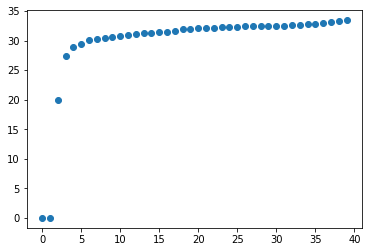

In [83]:
plt.plot(sorted(eigenval),'o')

obj 30 (2 cluster)

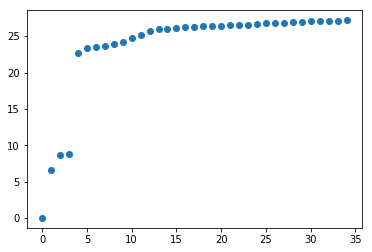

In [78]:
plt.plot(sorted(eigenval),'o')

obj 31 (3 cluster)

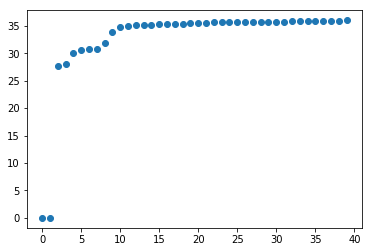

In [73]:
plt.plot(sorted(eigenval),'o')

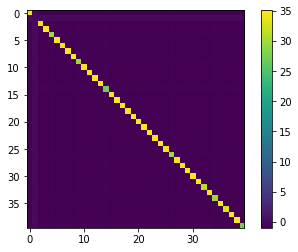

In [62]:
plt.imshow(lapl)
plt.colorbar()

In [92]:
labels = spectral.fit_predict(aff_mat)

In [93]:
labels

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int32)

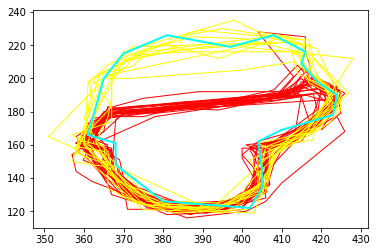

In [94]:
bb_objects = bb_info[bb_info["object_id"]==obj]
plt.figure()
colors = ["red","yellow","blue"]
for i,ylabel in enumerate(list(set(labels))):
    workers_in_cluster = np.where(labels==ylabel)[0]
    for widx in workers_in_cluster:
        plot_coords(worker_polygon(bb_objects,worker_lst[widx]),reverse_xy=True,color=colors[i],fill_color="")
plot_coords(ground_truth_T(obj),color="cyan",fill_color="",reverse_xy=True,lw=2)

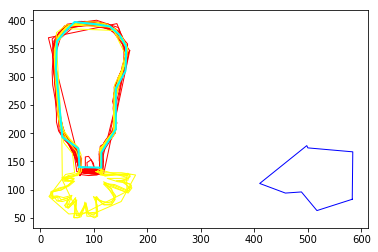

In [56]:
bb_objects = bb_info[bb_info["object_id"]==obj]
plt.figure()
colors = ["red","yellow","blue"]
for i,ylabel in enumerate(list(set(labels))):
    workers_in_cluster = np.where(labels==ylabel)[0]
    for widx in workers_in_cluster:
        plot_coords(worker_polygon(bb_objects,worker_lst[widx]),reverse_xy=True,color=colors[i],fill_color="")
plot_coords(ground_truth_T(obj),color="cyan",fill_color="",reverse_xy=True,lw=2)

In [130]:
def run_spectral_clustering(obj,N,PLOT=True):
    spectral = cluster.SpectralClustering(
            n_clusters=N, eigen_solver='arpack',
            affinity="precomputed")
    aff_mat,worker_lst = compute_jaccard_affinity_matrix(obj)
    labels = spectral.fit_predict(aff_mat)
    if PLOT: 
        bb_objects = bb_info[bb_info["object_id"]==obj]
        plt.figure()
        plt.title("Obj {}".format(obj))
        colors = ["blue","red","green","magenta"]
        for i,ylabel in enumerate(list(set(labels))):
            workers_in_cluster = np.where(labels==ylabel)[0]
            for widx in workers_in_cluster:
                plot_coords(worker_polygon(bb_objects,worker_lst[widx]),reverse_xy=True,color=colors[i],fill_color="")
        plot_coords(ground_truth_T(obj),color="cyan",fill_color="",reverse_xy=True,lw=3,linestyle='--',invert_y=True)
        plot_and_compute_laplacian_eigenval(obj,aff_mat,N)

In [131]:
objN_lst = [(1,2),(4,2),(7,2),(8,3),(10,2),(20,4),(15,2),(18,3),(20,4),(21,3),(22,4),(25,2),(26,2),(27,4),(28,2),(29,3),(30,2),(31,3),(32,2),(33,2),(34,3),(35,2),(37,2),(40,2),(42,2),(47,2)]

/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


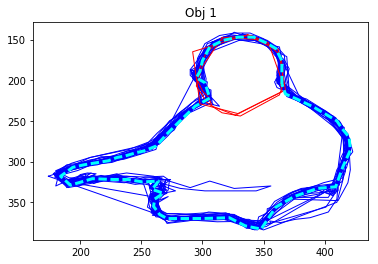

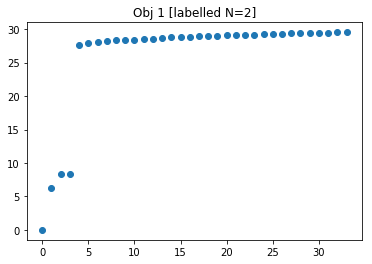

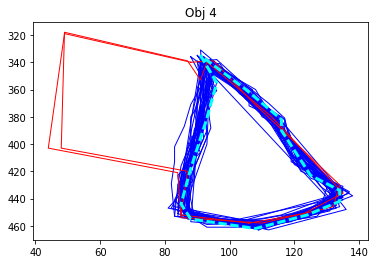

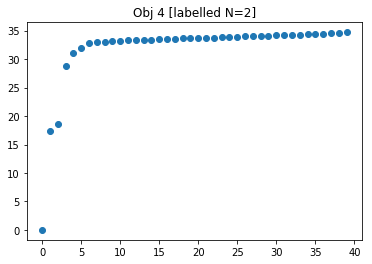

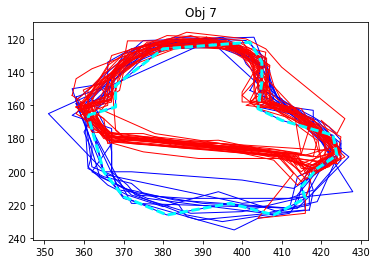

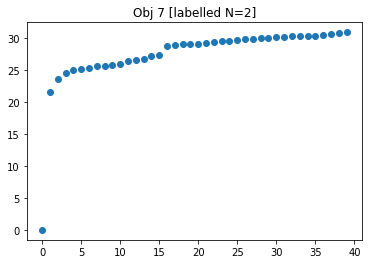

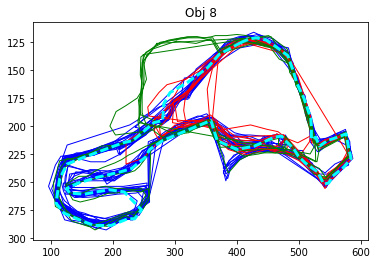

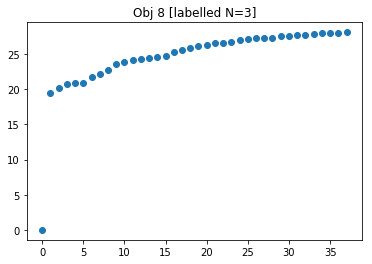

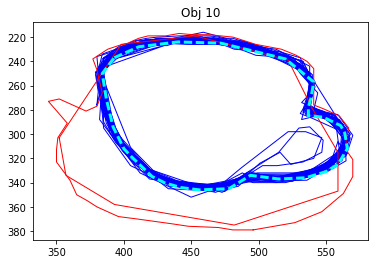

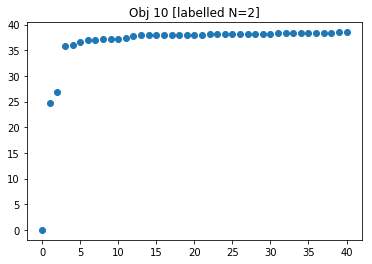

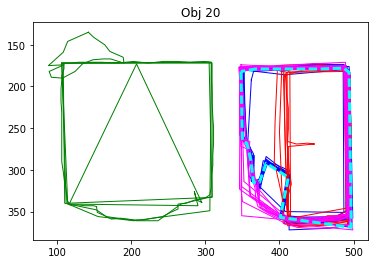

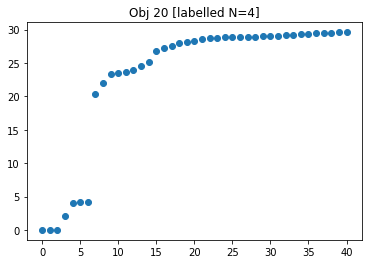

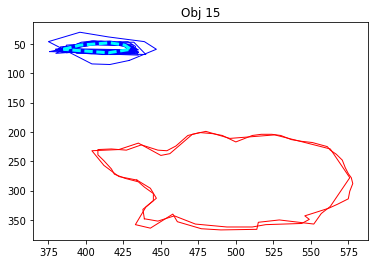

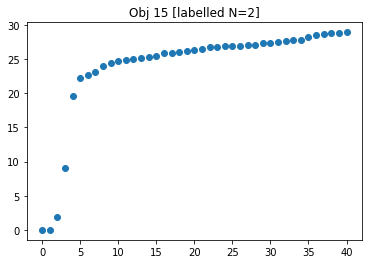

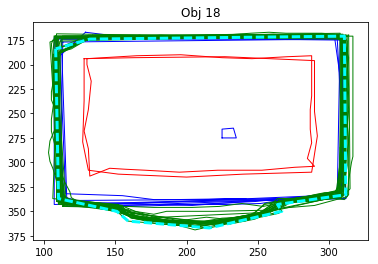

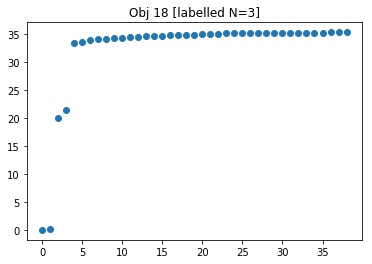

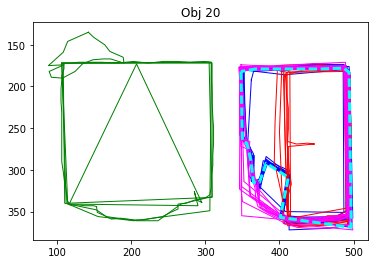

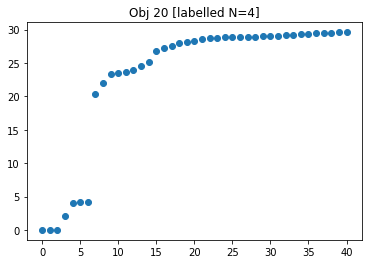

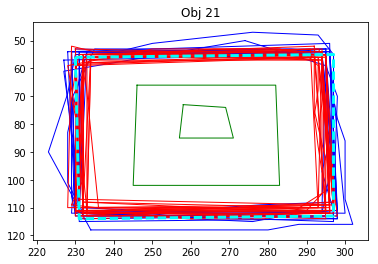

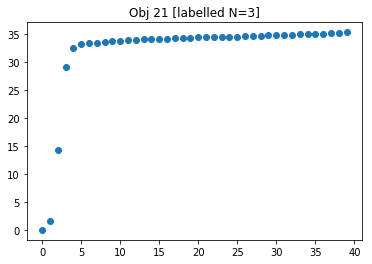

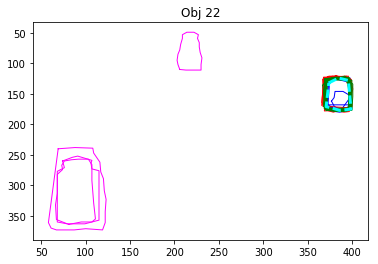

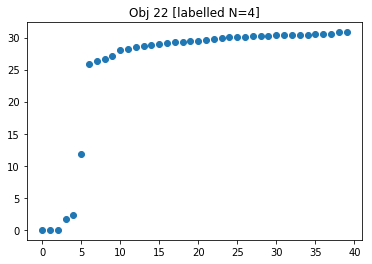

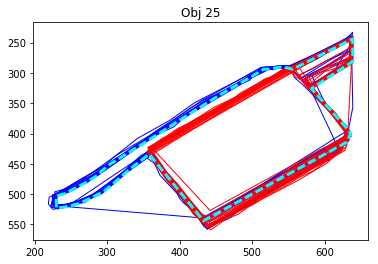

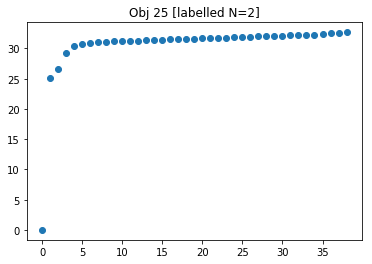

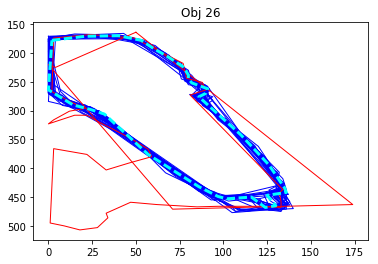

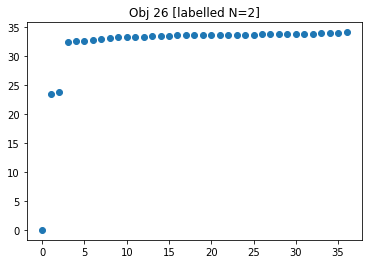

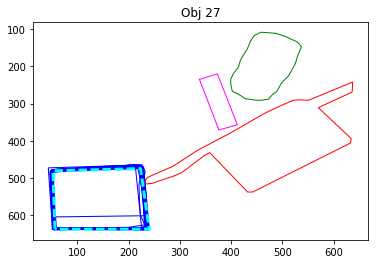

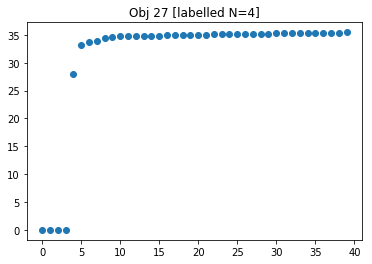

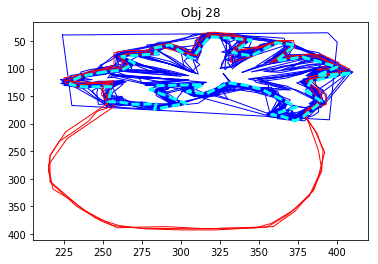

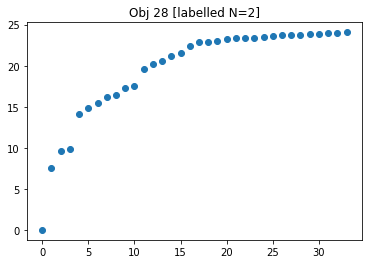

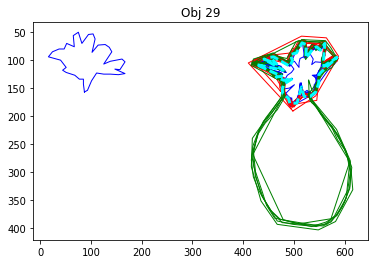

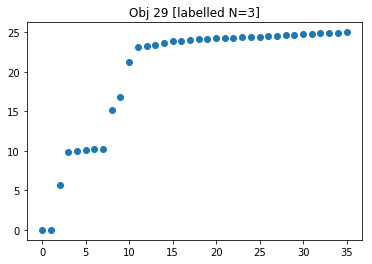

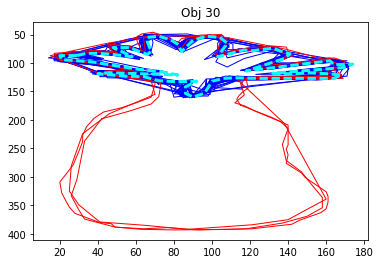

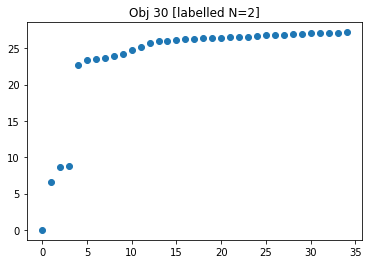

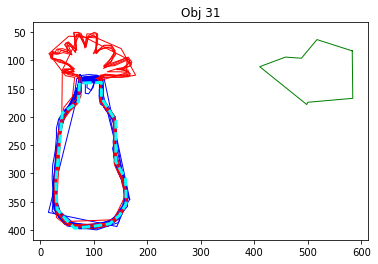

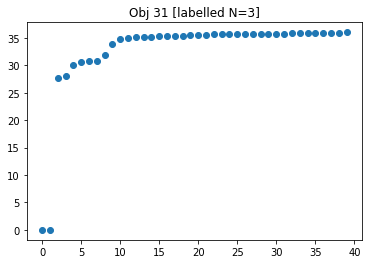

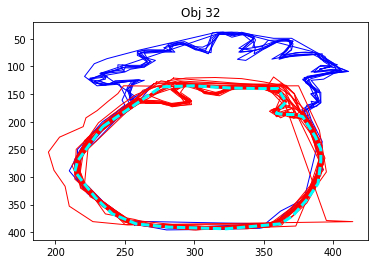

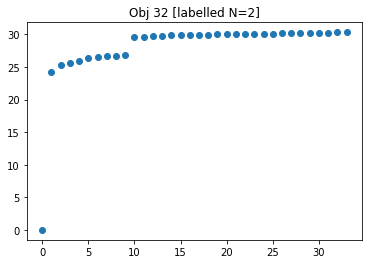

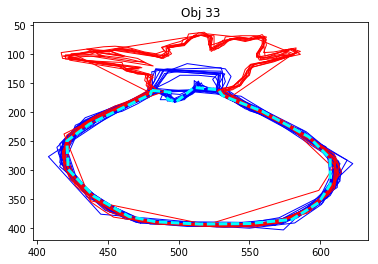

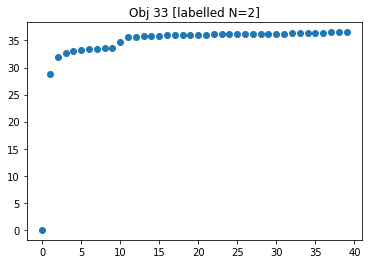

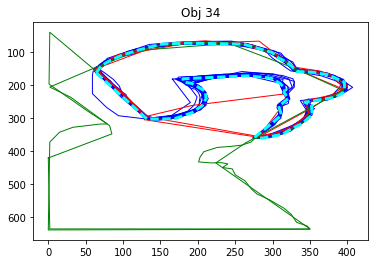

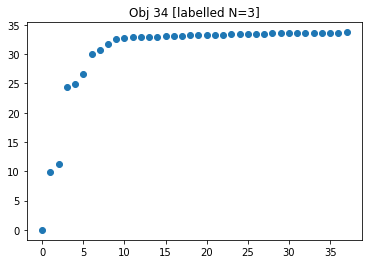

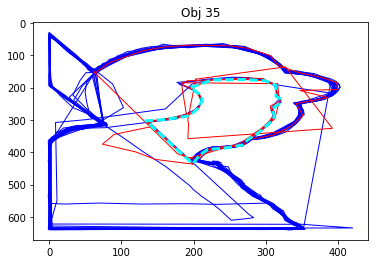

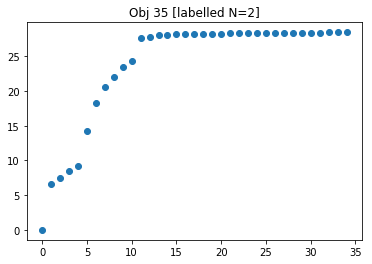

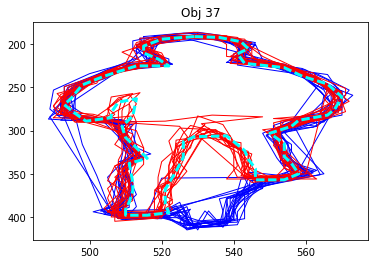

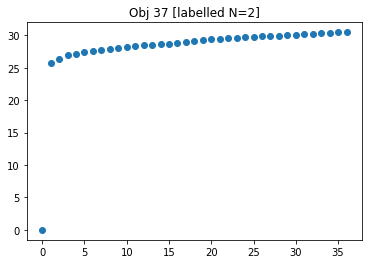

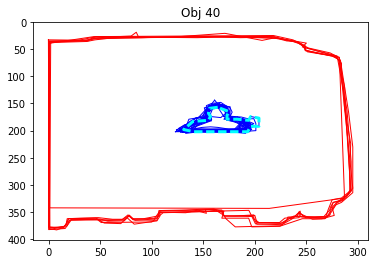

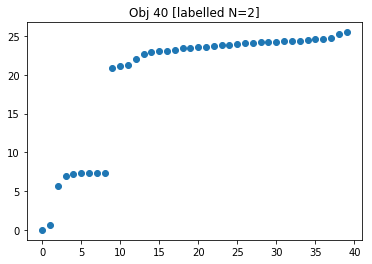

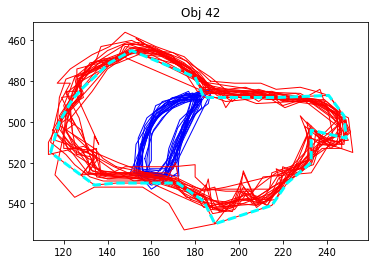

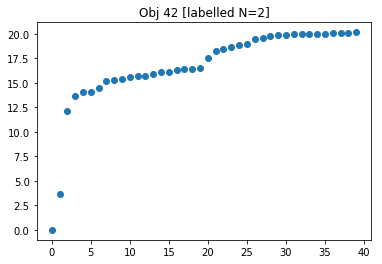

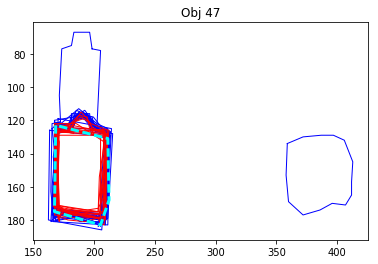

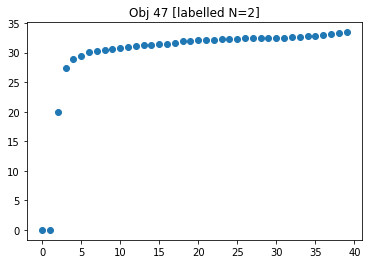

In [133]:
for objN in objN_lst:
    run_spectral_clustering(objN[0],objN[1])

In [134]:
import pygsp

In [141]:
aff_mat,worker_lst = compute_jaccard_affinity_matrix(4)
g = pygsp.graphs.Graph(aff_mat)

2018-02-04 17:29:34,795:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


In [146]:
len(aff_mat)

40

In [149]:
g = pygsp.graphs.Graph(aff_mat-np.eye(len(aff_mat)))

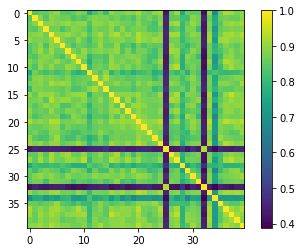

In [144]:
plt.imshow(aff_mat)
plt.colorbar()

In [150]:
g.compute_fourier_basis()

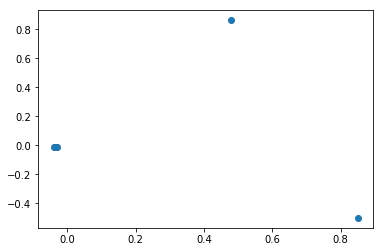

In [159]:
plt.plot(g.U[:,1],g.U[:,2],'o')

In [160]:
import sklearn

In [211]:
average_J  =[]
for obj in easy_tasks:
    aff_mat,worker_lst = compute_jaccard_affinity_matrix(obj)
    average_J.append(aff_mat.mean())

In [212]:
print mean(average_J)

0.868359661538


In [257]:
print min(average_J)

0.742936675345


In [213]:
hard_average_J  =[]
for obj in all_hard_tasks:
    aff_mat,worker_lst = compute_jaccard_affinity_matrix(obj)
    hard_average_J.append(aff_mat.mean())

In [214]:
print mean(hard_average_J)

0.724859030342


In [260]:
print max(hard_average_J)

0.910496456622


In [220]:
obj

47

In [228]:
aff_mat,worker_lst = compute_jaccard_affinity_matrix(obj)

misidentified no need to cluster obj 4

no need to cluster obj 2
no need to cluster obj 3
no need to cluster obj 4
no need to cluster obj 5
no need to cluster obj 9
no need to cluster obj 10
no need to cluster obj 12
no need to cluster obj 13
no need to cluster obj 14
no need to cluster obj 16
no need to cluster obj 18
no need to cluster obj 19
no need to cluster obj 21
no need to cluster obj 23
no need to cluster obj 24
no need to cluster obj 25
no need to cluster obj 26
no need to cluster obj 27
no need to cluster obj 31
no need to cluster obj 32
no need to cluster obj 33
no need to cluster obj 34
no need to cluster obj 36
no need to cluster obj 38
no need to cluster obj 39


KeyboardInterrupt: 

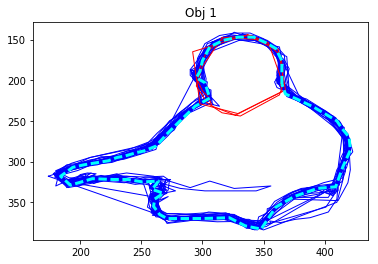

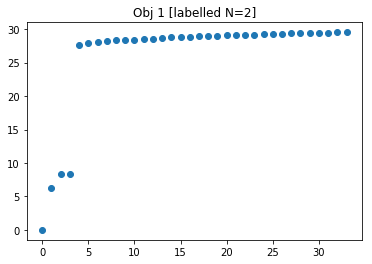

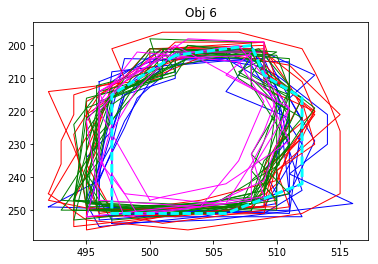

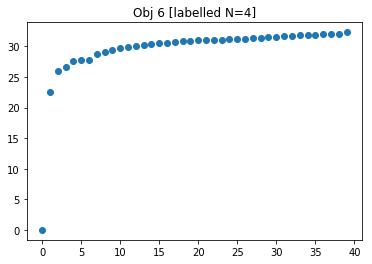

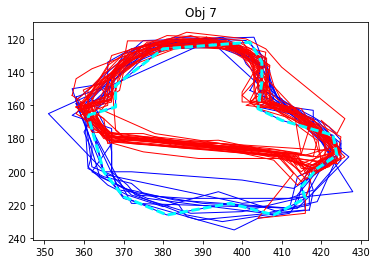

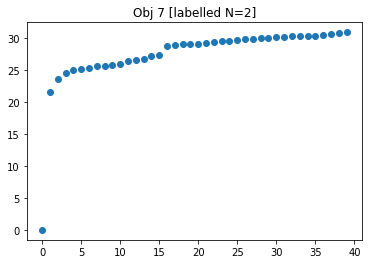

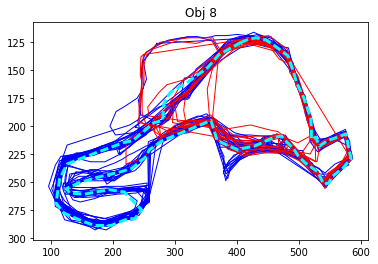

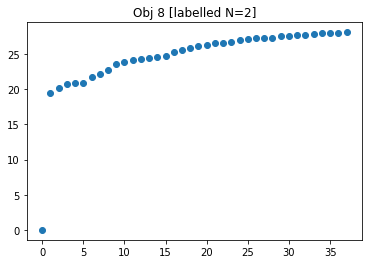

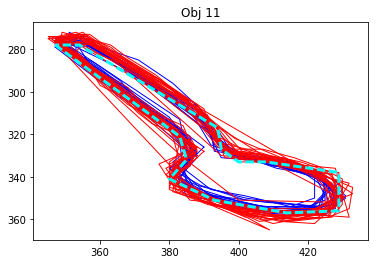

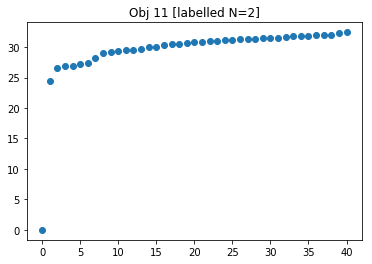

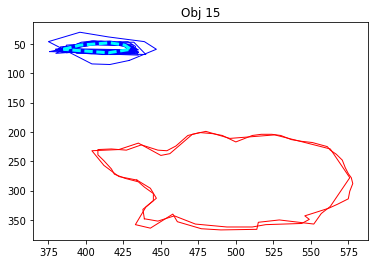

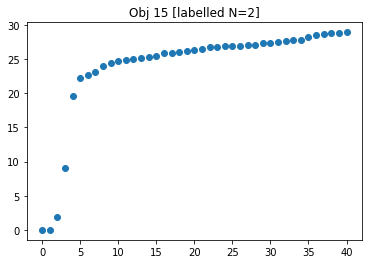

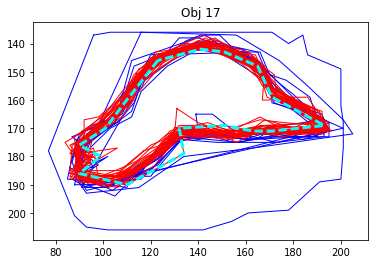

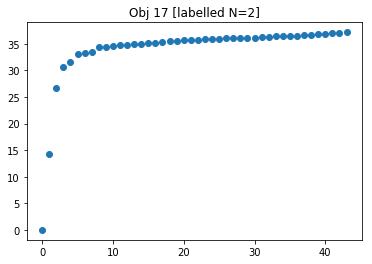

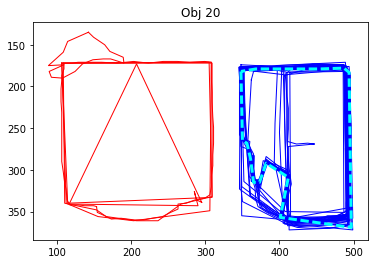

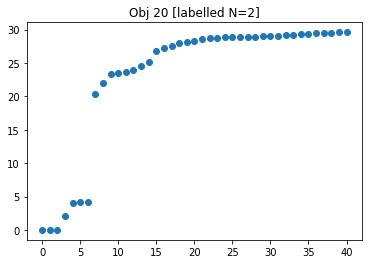

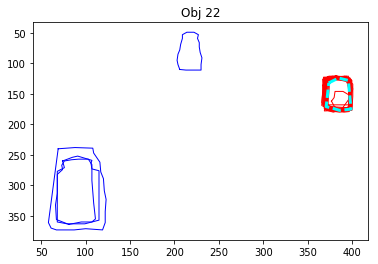

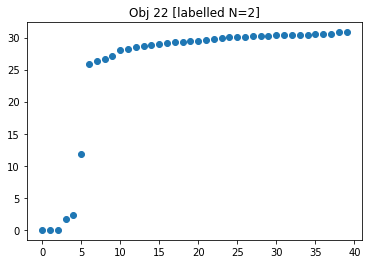

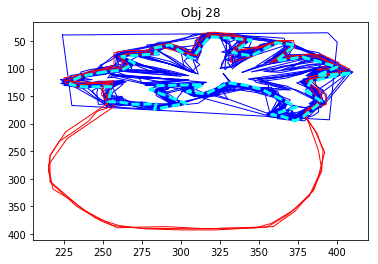

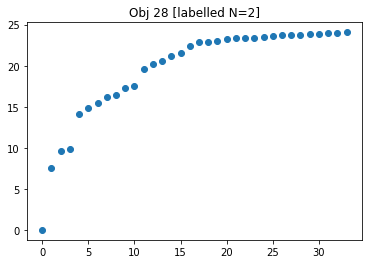

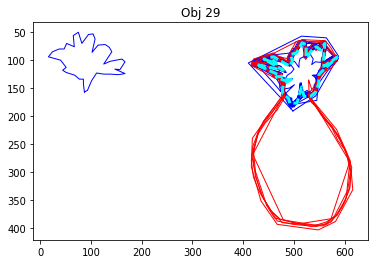

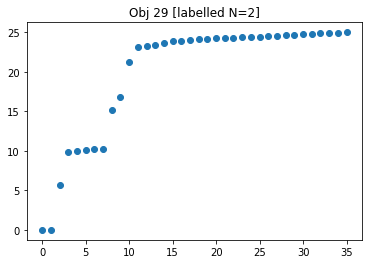

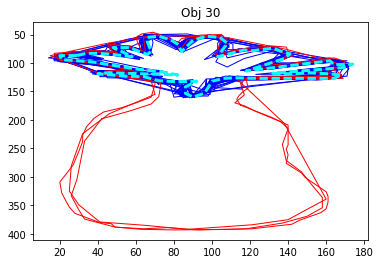

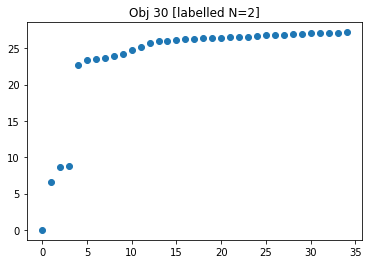

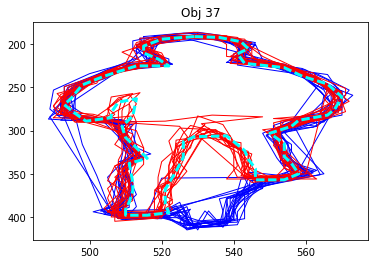

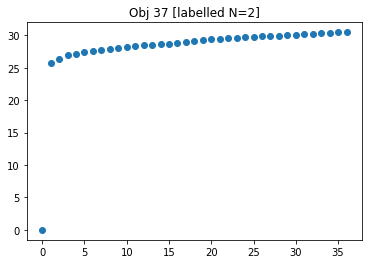

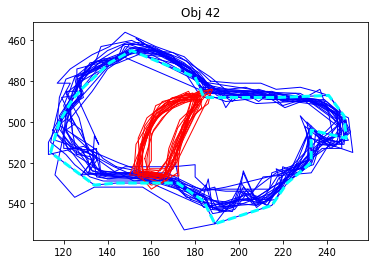

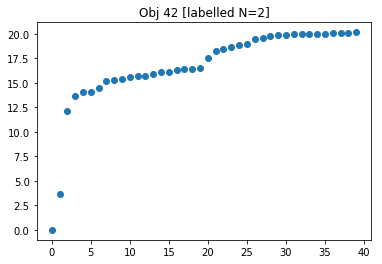

In [255]:
for obj in object_lst:
#     aff_mat,worker_lst = compute_jaccard_affinity_matrix(obj)
    aff_mat,worker_lst = compute_jaccard_affinity_matrix(obj)
    if aff_mat.mean() < 0.7:
        # if average jaccard is lower 
        silst =[]
        cluster_to_test=[2,3,4,5,6,7]
        for N in cluster_to_test:
            if N==1:
                labels = np.ones((len(aff_mat),))
            else:
                spectral = cluster.SpectralClustering(
                            n_clusters=N, eigen_solver='arpack',
                            affinity="precomputed")
                labels = spectral.fit_predict(aff_mat)
            cluster_centers = []
            for i,ylabel in enumerate(list(set(labels))):
                workers_in_cluster = np.where(labels==ylabel)[0]
                cluster_centers.append(aff_mat[:,workers_in_cluster][workers_in_cluster].mean())
    #             print cluster_centers
    #             print average(cluster_centers)
    #             print max(cluster_centers)
    #             max_cluster_centers.append(max(cluster_centers))
    #         #     print max(cluster_centers)
            silst.append(sklearn.metrics.silhouette_score(aff_mat,labels))
        best_cluster = np.argmax(silst)
        N=cluster_to_test[best_cluster]
        run_spectral_clustering(obj,N,aff_mat,worker_lst)
    else:
        print "no need to cluster obj",obj

In [254]:
def run_spectral_clustering(obj,N,aff_mat,worker_lst,PLOT=True):
    spectral = cluster.SpectralClustering(
            n_clusters=N, eigen_solver='arpack',
            affinity="precomputed")
    labels = spectral.fit_predict(aff_mat)
    if PLOT: 
        bb_objects = bb_info[bb_info["object_id"]==obj]
        plt.figure()
        plt.title("Obj {}".format(obj))
        colors = ["blue","red","green","magenta"]
        for i,ylabel in enumerate(list(set(labels))):
            workers_in_cluster = np.where(labels==ylabel)[0]
            for widx in workers_in_cluster:
                plot_coords(worker_polygon(bb_objects,worker_lst[widx]),reverse_xy=True,color=colors[i],fill_color="")
        plot_coords(ground_truth_T(obj),color="cyan",fill_color="",reverse_xy=True,lw=3,linestyle='--',invert_y=True)
        plot_and_compute_laplacian_eigenval(obj,aff_mat,N)

In [187]:
max_cluster_centers

[0.70758856230221656, 0.71818622908744456, 0.73172641935937766]

In [176]:
labels

array([1, 0, 0, 1, 3, 2, 2, 3, 2, 0, 3, 2, 0, 0, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       2, 3, 3, 2, 0, 1, 0, 0, 2, 2, 2, 1, 2, 0, 0], dtype=int32)

In [177]:
workers_in_cluster = np.where(labels==ylabel)[0]

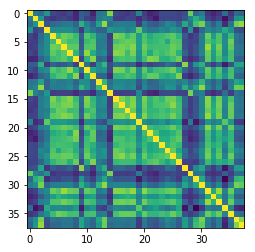

In [175]:
plt.imshow(aff_mat)

In [173]:
# sklearn.metrics.silhouette_score(aff_mat,np.ones((len(aff_mat),),dtype=int32))